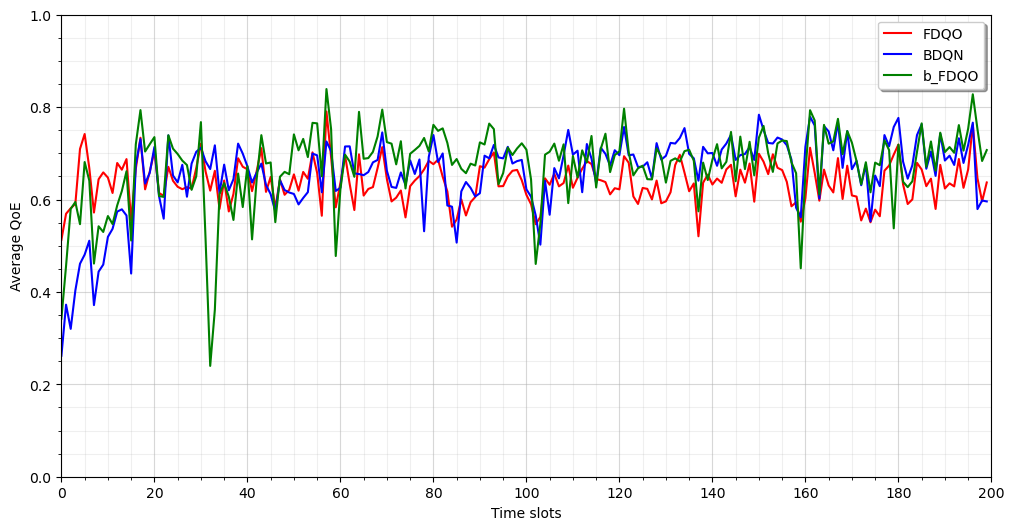

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd
from scipy.interpolate import make_interp_spline

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

a = 5
b = 70
data1 = pd.read_csv("FDQO_5phut_M900_1000_0.9_200steps.csv").values[:200, 1]
data2 = pd.read_csv("BDQL_5phut_M900_1000_200steps_gamma_0.9.csv").values[:201, 1]
data3 = pd.read_csv("FDQO_5phut_M900_1000_baseline_200steps_g0.9_3.csv").values[:201, 1]
# data4 = pd.read_csv("RGreedy_5phut.csv").values[:101, 2]
number = np.asarray([i for i in range(data1.shape[0])])
X_Y_Spline = make_interp_spline(number, data1)
X_ = np.linspace(number.min(), number.max(), 200)
Y_ = X_Y_Spline(X_)
ax.plot(X_, Y_, color="red", label = "FDQO")
Baverage1 = np.average(data1[0:a])
Waverage1 = np.average(data1[0:200])
Laverage1 = np.average(data1[b:100])

X_Y_Spline = make_interp_spline(number, data2)
X_ = np.linspace(number.min(), number.max(), 200)
Y_ = X_Y_Spline(X_)
# plt.plot(number, [np.average(data2[a:b])] * data2.shape[0], color="red", linestyle = '--')
ax.plot(X_, Y_, color="blue", label = "BDQN")
Baverage2 = np.average(data2[0:a])
Waverage2 = np.average(data2[0:200])
Laverage2 = np.average(data2[b:100])

X_Y_Spline = make_interp_spline(number, data3)
X_ = np.linspace(number.min(), number.max(), 200)
Y_ = X_Y_Spline(X_)
# plt.plot(number, [np.average(data2[a:b])] * data2.shape[0], color="red", linestyle = '--')
ax.plot(X_, Y_, color="green", label = "b_FDQO")
# Baverage7 = np.average(data7[0:a])
# Waverage7 = np.average(data7[0:100])
# Laverage7 = np.average(data7[b:100])
# # plt.plot(number, [np.average(data6[a:b])] * data6.shape[0], color="purple", linestyle = '--')
# ax.plot(number, data8, color="gray", label = "Greedy")
# Baverage8 = np.average(data8[0:a])
# Waverage8 = np.average(data8[0:100])
# Laverage8 = np.average(data8[b:100])

plt.xlabel("Time slots")
plt.ylabel("Average QoE")
plt.legend(fancybox=True, shadow=True)
# plt.xticks(np.arange(0, 101, 5.0))
# plt.axis([0, 100, 0, 1])
ax.axis([0, 200, 0, 1])
major_ticks = np.arange(0, 201, 20)
minor_ticks = np.arange(0, 201, 5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(np.arange(0,1.05,0.2))
ax.set_yticks(np.arange(0,1.05,0.05), minor=True)

ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
#plt.savefig("../../Pictures/bFDQO_vs_others_200tslots.pdf")
plt.show()


In [38]:
Waverage1, Waverage2

(0.6378192656562917, 0.6497135600958994)

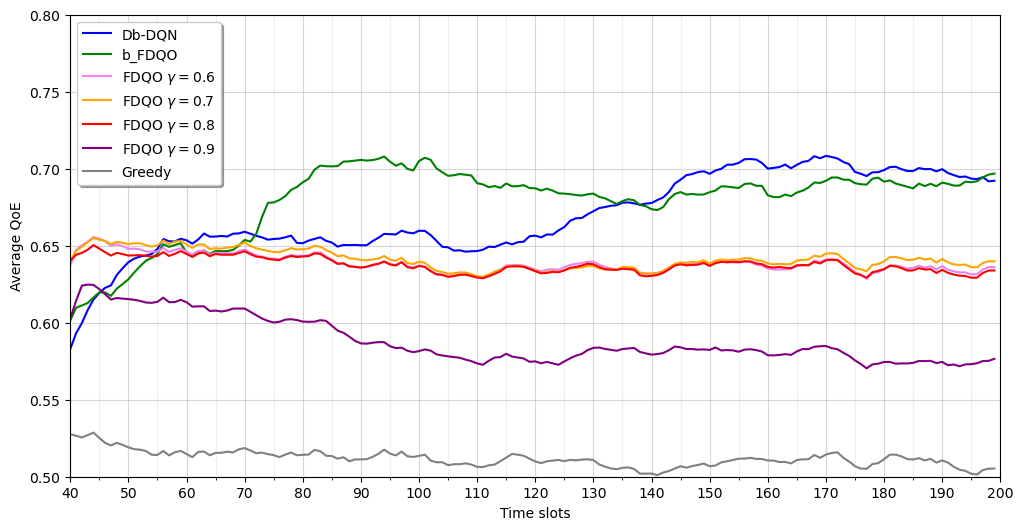

In [66]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd
from scipy.interpolate import make_interp_spline

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#data1 = pd.read_csv("FDQO_5phut_M900_1000_200steps_g0.9.csv").values[:201, 1]
data1 = pd.read_csv("FDQO_5phut_M900_1000_0.9_200steps.csv").values[:201, 1]
data2 = pd.read_csv("BDQL_5phut_M900_1000_200steps_gamma_0.9.csv").values[:201, 1]
data3 = pd.read_csv("FDQO_5phut_M900_1000_baseline_200steps_g0.9_3.csv").values[:201, 1]
data4 = pd.read_csv("FDQO_5phut_M900_1000_0.9_g0.7.csv.csv").values[:201, 1]
data5 = pd.read_csv("FDQO_5phut_M900_1000_200steps_g0.9.csv").values[:201, 1]
data6 = pd.read_csv("FDQO_5phut_M900_1000_0.9_g0.6.csv").values[:201, 1]
data7 = pd.read_csv("RGreedy_5phut.csv").values[:201, 2]
number = [i for i in range(data1.shape[0])]
moving_average_step = 40
df2 = pd.DataFrame(data=data2, columns=["value"])
df_ma2 = df2.value.rolling(moving_average_step, center=False, closed='left').mean()
df_ma2.plot(color="blue", label = "Db-DQN")
df3 = pd.DataFrame(data=data3, columns=["value"])
df_ma3 = df3.value.rolling(moving_average_step, center=False, closed='left').mean()
df_ma3.plot(color="green", label = "b_FDQO")
df6 = pd.DataFrame(data=data6, columns=["value"])
df_ma6 = df6.value.rolling(moving_average_step, center=False, closed='left').mean()
df_ma6.plot(color="violet", label = "FDQO $\gamma = 0.6$")

df4 = pd.DataFrame(data=data4, columns=["value"])
df_ma4 = df4.value.rolling(moving_average_step, center=False, closed='left').mean()
df_ma4.plot(color="orange", label = "FDQO $\gamma = 0.7$")
df1 = pd.DataFrame(data=data1, columns=["value"])
df_ma1 = df1.value.rolling(moving_average_step, center=False, closed='left').mean()
df_ma1.plot(color="red", label = "FDQO $\gamma = 0.8$")
df5 = pd.DataFrame(data=data5, columns=["value"])
df_ma5 = df5.value.rolling(moving_average_step, center=False, closed='left').mean()
df_ma5.plot(color="purple", label = "FDQO $\gamma = 0.9$")
df7 = pd.DataFrame(data=data7, columns=["value"])
df_ma7 = df7.value.rolling(moving_average_step, center=False, closed='left').mean()
df_ma7.plot(color="gray", label = "Greedy")
plt.xlabel("Time slots")
plt.ylabel("Average QoE")
plt.legend(fancybox=True, shadow=True)
# plt.xticks(np.arange(0, 101, 5.0))
# plt.axis([0, 100, 0, 1])
ax.axis([moving_average_step, 100, 0.5, 0.75])
major_ticks = np.arange(moving_average_step, 201, 10)
minor_ticks = np.arange(moving_average_step, 201, 5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(np.arange(0.5,0.8,0.05))
ax.set_yticks(np.arange(0.5,0.8,0.05), minor=True)

ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.savefig("../../Pictures/bFDQO_200tslots_vs_others_moving_average.pdf")
plt.show()

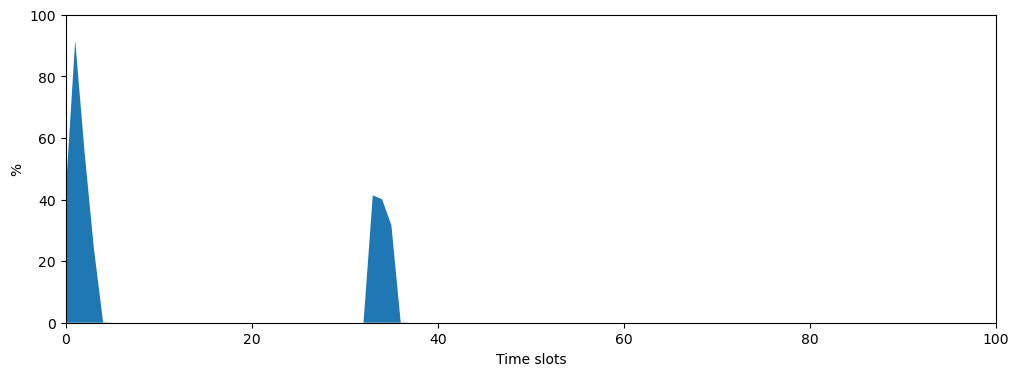

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100 

df = pd.read_csv("kqFDQO_M900_1000_baseline_200steps_g0.9_3.csv").values
df = df[:int(df.shape[0]+1),0]
#df_slide_1000 = [df[i:(i+1000)] for i in 299]
df = df.flatten()
df_list = df.tolist()
df_list
data = pd.read_csv("FDQO_5phut_M900_1000_baseline_200steps_g0.9_3.csv").values
nb_steps = data[:,5].flatten().tolist()
step = data[:,6].flatten().tolist()
# df_list_splice = [list(df_list[int(i - j): int(i)]) for j in nb_steps for i in step]
# df_list_splice
test = [df_list[int(i - j): int(i)] for j, i in zip(nb_steps, step)]
test.pop(-1) # somehow the last is empty
sum_of_subtest = [sum(sublist) / len(sublist) * 100 for sublist in test]
plt.fill_between([i for i in range(len(sum_of_subtest))], 0, sum_of_subtest)
#plt.title("Percentage of using Fuzzy table (FDQO)")
plt.xlabel("Time slots")
plt.ylabel("%")
plt.axis([0, 100, 0, 100])
#plt.savefig("../../Pictures/Percentage_bFDQO_200tslots.pdf")
plt.show()

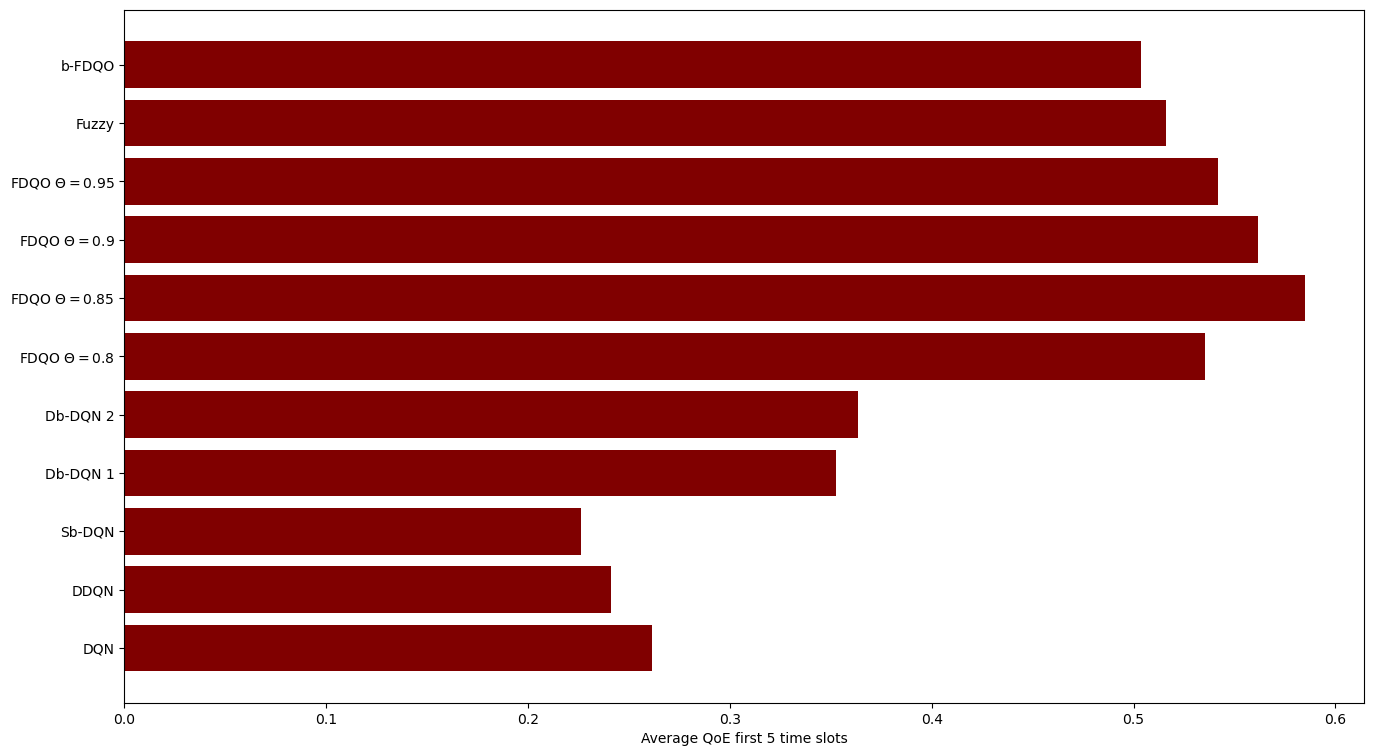

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

fig, ax = plt.subplots(figsize =(16, 9))
algos = list()
values = list()
data1 = pd.read_csv("../csvFilesNorm/DQL_5phut_M900_1000_mem25_4.csv").values[:100, 1]
Baverage1 = np.average(data1[0:5])
values.append(Baverage1)
algos.append("DQN")
data2 = pd.read_csv("../csvFilesNorm/DDQL_5phut_M900_1000_mem25_3.csv").values[:101, 1]
Baverage2 = np.average(data2[0:5])
values.append(Baverage2)
algos.append("DDQN")
data3 = pd.read_csv("../csvFilesNorm/BDQL_5phut_M900_1000_0.1_0.05_b0.6_que5000_fix.csv").values[:101, 1]
Baverage3 = np.average(data3[0:5])
values.append(Baverage3)
algos.append("Sb-DQN")
data4 = pd.read_csv("../csvFilesNorm/BDQL_5phut_M900_1000_dyn_e0.1_k0.3_que10k_b0.5.csv").values[:101, 1]
Baverage4 = np.average(data4[0:5])
values.append(Baverage4)
algos.append("Db-DQN 1")
data5 = pd.read_csv("BDQL_5phut_M900_1000_200steps_gamma_0.9.csv").values[:101, 1]
Baverage5 = np.average(data5[0:5])
values.append(Baverage5)
algos.append("Db-DQN 2")
data6 = pd.read_csv("../csvFilesNorm/FDQO_5phut_M900_1000_0.8_exlre0.0.csv").values[:100, 1]
Baverage6 = np.average(data6[0:5])
values.append(Baverage6)
algos.append("FDQO $\Theta = 0.8$")
data7 = pd.read_csv("../csvFilesNorm/FDQO_5phut_M900_1000_0.85.csv").values[:101, 1]
Baverage7 = np.average(data7[0:5])
values.append(Baverage7)
algos.append("FDQO $\Theta = 0.85$")
data8 = pd.read_csv("../csvFilesNorm/FDQO_5phut_M900_1000_0.9_exlre0.0.csv").values[:101, 1]
Baverage8 = np.average(data8[0:5])
values.append(Baverage8)
algos.append("FDQO $\Theta = 0.9$")
data9 = pd.read_csv("../csvFilesNorm/FDQO_5phut_M900_1000_0.95_exlre0.0.csv").values[:101, 1]
Baverage9 = np.average(data9[0:5])
values.append(Baverage9)
algos.append("FDQO $\Theta = 0.95$")
data10 = pd.read_csv("../csvFilesNorm/FDQO_5phut_all_fuzzy.csv").values[:101, 1]
Baverage10 = np.average(data10[0:5])
values.append(Baverage10)
algos.append("Fuzzy")
data11 = pd.read_csv("FDQO_5phut_M900_1000_baseline_200steps_g0.9_3.csv").values[:101, 1]
Baverage11 = np.average(data11[0:5])
values.append(Baverage11)
algos.append("b-FDQO")
 
# creating the bar plot
ax.barh(algos, values, color ='maroon')
ax.set_yticks(algos)
plt.xlabel("Average QoE first 5 time slots")
plt.savefig("../../Pictures/First_5_time_slots.pdf")
plt.show()